In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc("text", usetex=False)
rc("font", family = "serif")
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")

# Problem 5

### a

I want to have $y \in [0,1]$. So i'll use y = CDF(x) and solve for x in terms of y

CDF(y) = $\frac{1}{\mu}\left[\frac{1}{x_{min}^{\mu}}-\frac{1}{y^{\mu}}\right]$

this ends up giving:
$ x = \left(x_{min}^{-\mu}\cdot(1-y)\right)^{-1/-\mu}$
 which i use to draw from $P(x) \propto \frac{1}{x^{1+\mu}}$


In [6]:
def inv_cdf(y,mu,xmin):
    return (xmin**(-mu) *(1-y))**(1/-mu)

In [7]:
y = np.random.uniform(0,1,10000)
xmin = .2
x_25 = inv_cdf(y, mu=2.5, xmin=xmin)
x_15 = inv_cdf(y, mu=1.5, xmin=xmin)
x_05 = inv_cdf(y, mu=0.5, xmin=xmin)
# hist = plt.hist(x_25,bins=100,density=True)
# hist = plt.hist(x_15,bins=100,density=True)
# hist = plt.hist(x_05,bins=100,density=True)
# plt.ylim([0,1])
# plt.xlim([0,10])

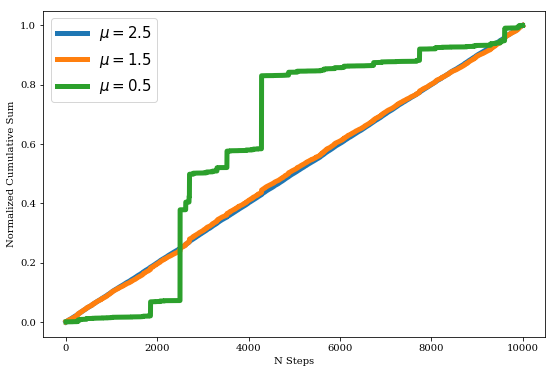

In [8]:
fs =15
lw = 5
plt.plot(np.cumsum(x_25[:10000]/np.cumsum(x_25[:10000]).max()),label=r'$\mu=2.5$',lw=lw)

plt.plot(np.cumsum(x_15[:10000]/np.cumsum(x_15[:10000]).max()),label=r'$\mu=1.5$',lw=lw)
plt.plot(np.cumsum(x_05[:10000]/np.cumsum(x_05[:10000]).max()),label=r'$\mu=0.5$',lw=lw)
plt.ylabel('Normalized Cumulative Sum')
plt.xlabel('N Steps')
plt.legend(fontsize=15)
plt.show()

## b

From the below work I can see that the distribution of rho values is peaked for mu = 2.5, 1.5 and is just a mess for mu=0.5.

I also find that going to larger N has a slight effect of making the distribution tighter.

## $\mu=2.5$

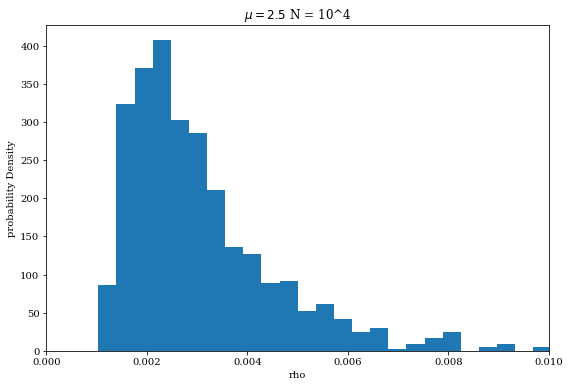

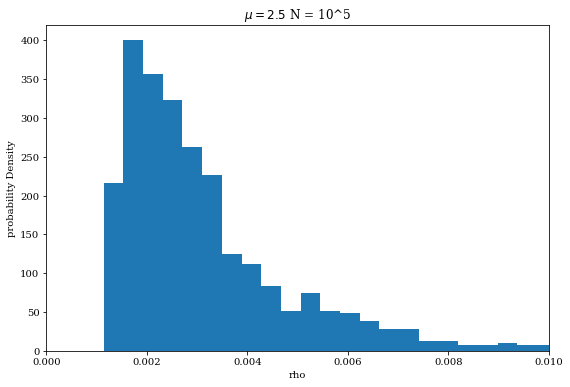

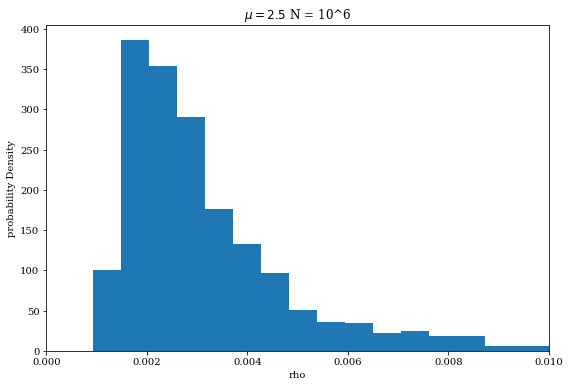

In [9]:
def rho(X):
    return np.max(X[:-1]-X[1:])/X.sum()

def gen_rhos(mu,N, m_sample):
    rhos = np.zeros(m_sample)
    for i in range(m_sample):
        y = np.random.uniform(0,1,10**4)

        X = inv_cdf(y, mu=mu, xmin=.01)
        rhos[i] = rho(X)
    return rhos
m_sample = 1000
xlim = [0,0.01]
hist = plt.hist(gen_rhos(2.5,1000,m_sample),bins=100,density =True)
plt.title(r'$\mu=2.5$ N = 10^4')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()

hist = plt.hist(gen_rhos(2.5,10**5,m_sample),bins=100,density =True)
plt.title(r'$\mu=2.5$ N = 10^5')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()

hist = plt.hist(gen_rhos(2.5,10**6,m_sample),bins=100,density =True)
plt.title(r'$\mu=2.5$ N = 10^6')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()



## $\mu=1.5$

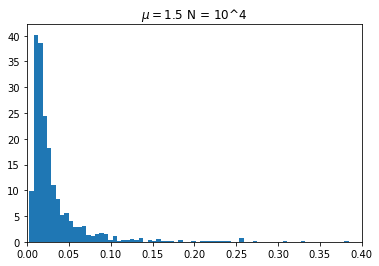

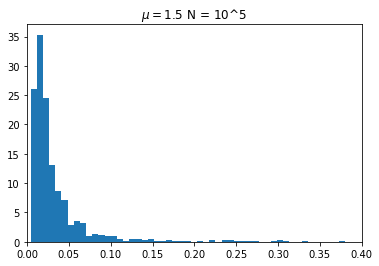

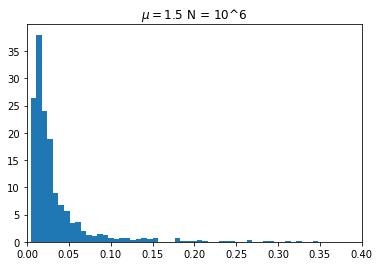

In [265]:
xlim=[0,.4]
hist = plt.hist(gen_rhos(1.5,1000,m_sample),bins=100,density =True)
plt.title(r'$\mu=1.5$ N = 10^4')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()

hist = plt.hist(gen_rhos(1.5,10**5,m_sample),bins=100,density =True)
plt.title(r'$\mu=1.5$ N = 10^5')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()

hist = plt.hist(gen_rhos(1.5,10**6,m_sample),bins=100,density =True)
plt.title(r'$\mu=1.5$ N = 10^6')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()

## $\mu=0.5$

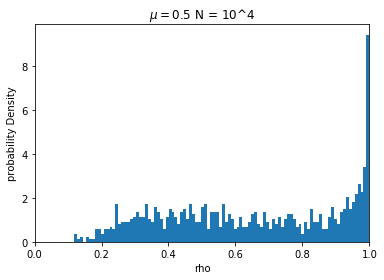

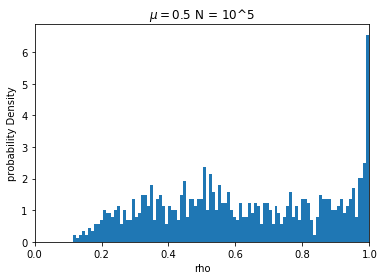

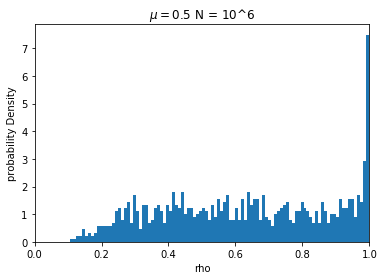

In [275]:
xlim=[0,1]
hist = plt.hist(gen_rhos(.5,1000,m_sample),bins=100,density =True)
plt.title(r'$\mu=0.5$ N = 10^4')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')

plt.show()

hist = plt.hist(gen_rhos(.5,10**5,m_sample),bins=100,density =True)
plt.title(r'$\mu=0.5$ N = 10^5')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()

hist = plt.hist(gen_rhos(.5,10**6,m_sample),bins=100,density =True)
plt.title(r'$\mu=0.5$ N = 10^6')
plt.xlim(xlim)
plt.ylabel('probability Density')
plt.xlabel('rho')
plt.show()